In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import optuna
import xgboost
import lightgbm
import catboost
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

from collections import Counter



In [119]:
data = pd.read_csv('train_c.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

<Axes: xlabel='LoanApproved', ylabel='Count'>

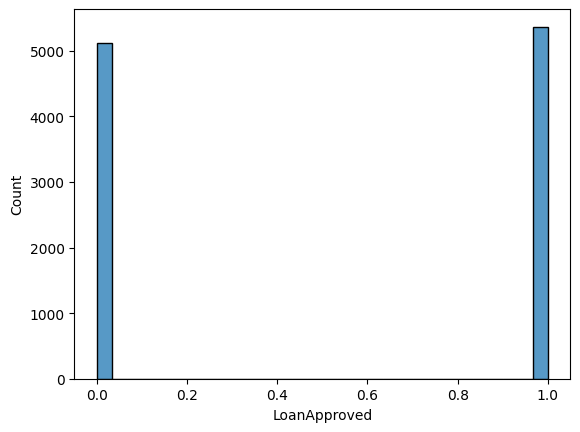

<Axes: xlabel='CreditScore', ylabel='Count'>

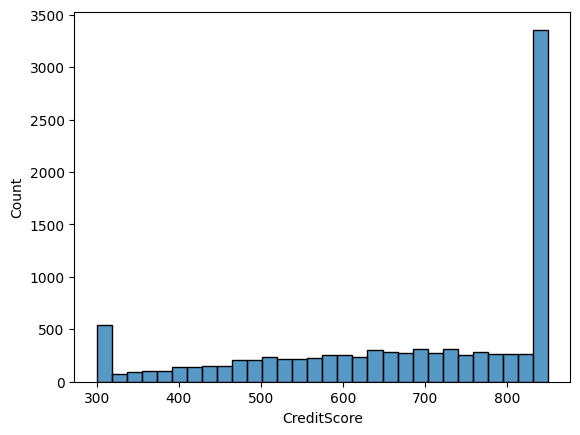

In [120]:
sns.histplot(data['LoanApproved'], bins=30)
plt.show()
sns.histplot(data['CreditScore'], bins=30)
plt.show()

<Figure size 1000x1200 with 0 Axes>

<Axes: >

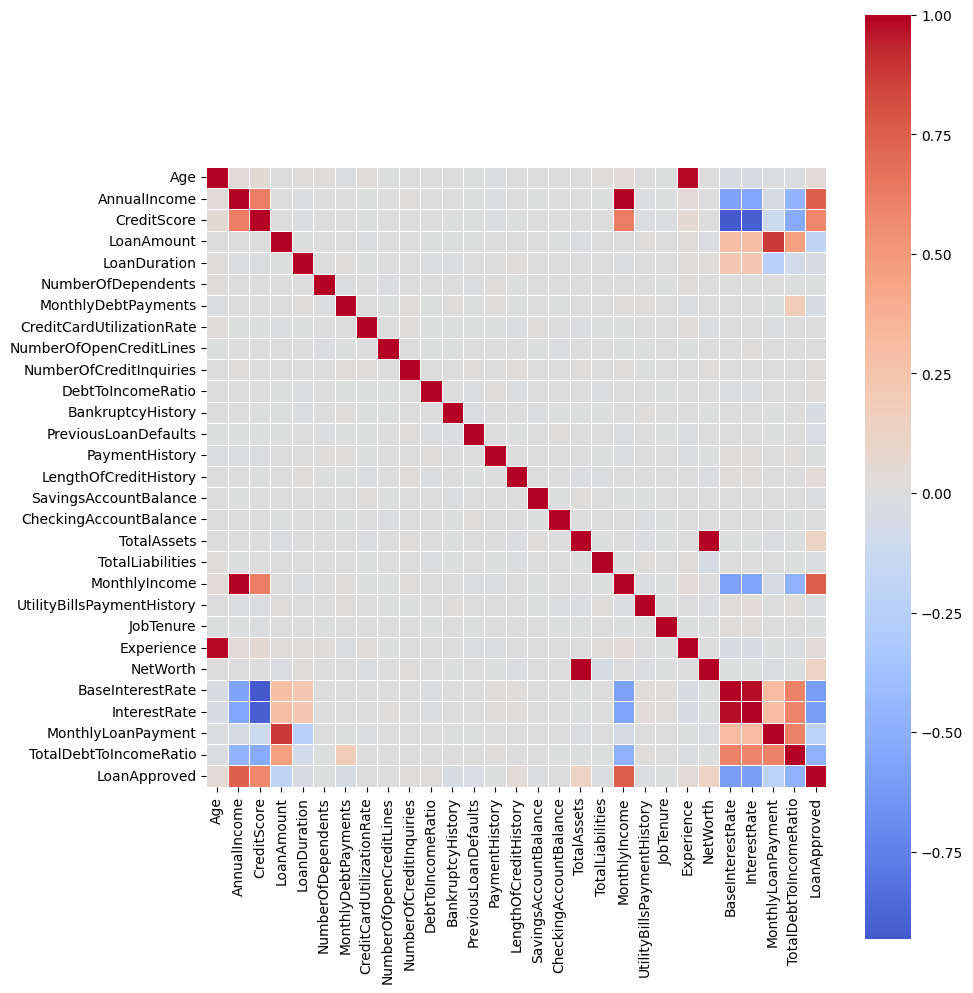

In [121]:
plt.figure(figsize=(10, 12))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, center=0, cmap='coolwarm', square=True, linewidths=.5)

In [122]:
def transorm(data):
    data1 = data.copy()
    data1 = data1.drop(['ApplicationDate'], axis=1)

    


    return data1

<Axes: xlabel='LoanApproved', ylabel='Age'>

Text(0.5, 1.0, 'LoanApproved vs Age')

<Axes: xlabel='LoanApproved', ylabel='AnnualIncome'>

Text(0.5, 1.0, 'LoanApproved vs AnnualIncome')

<Axes: xlabel='LoanApproved', ylabel='CreditScore'>

Text(0.5, 1.0, 'LoanApproved vs CreditScore')

<Axes: xlabel='LoanApproved', ylabel='LoanAmount'>

Text(0.5, 1.0, 'LoanApproved vs LoanAmount')

<Axes: xlabel='LoanApproved', ylabel='LoanDuration'>

Text(0.5, 1.0, 'LoanApproved vs LoanDuration')

<Axes: xlabel='LoanApproved', ylabel='NumberOfDependents'>

Text(0.5, 1.0, 'LoanApproved vs NumberOfDependents')

<Axes: xlabel='LoanApproved', ylabel='MonthlyDebtPayments'>

Text(0.5, 1.0, 'LoanApproved vs MonthlyDebtPayments')

<Axes: xlabel='LoanApproved', ylabel='CreditCardUtilizationRate'>

Text(0.5, 1.0, 'LoanApproved vs CreditCardUtilizationRate')

<Axes: xlabel='LoanApproved', ylabel='NumberOfOpenCreditLines'>

Text(0.5, 1.0, 'LoanApproved vs NumberOfOpenCreditLines')

<Axes: xlabel='LoanApproved', ylabel='NumberOfCreditInquiries'>

Text(0.5, 1.0, 'LoanApproved vs NumberOfCreditInquiries')

<Axes: xlabel='LoanApproved', ylabel='DebtToIncomeRatio'>

Text(0.5, 1.0, 'LoanApproved vs DebtToIncomeRatio')

<Axes: xlabel='LoanApproved', ylabel='BankruptcyHistory'>

Text(0.5, 1.0, 'LoanApproved vs BankruptcyHistory')

<Axes: xlabel='LoanApproved', ylabel='PreviousLoanDefaults'>

Text(0.5, 1.0, 'LoanApproved vs PreviousLoanDefaults')

<Axes: xlabel='LoanApproved', ylabel='PaymentHistory'>

Text(0.5, 1.0, 'LoanApproved vs PaymentHistory')

<Axes: xlabel='LoanApproved', ylabel='LengthOfCreditHistory'>

Text(0.5, 1.0, 'LoanApproved vs LengthOfCreditHistory')

<Axes: xlabel='LoanApproved', ylabel='SavingsAccountBalance'>

Text(0.5, 1.0, 'LoanApproved vs SavingsAccountBalance')

<Axes: xlabel='LoanApproved', ylabel='CheckingAccountBalance'>

Text(0.5, 1.0, 'LoanApproved vs CheckingAccountBalance')

<Axes: xlabel='LoanApproved', ylabel='TotalAssets'>

Text(0.5, 1.0, 'LoanApproved vs TotalAssets')

<Axes: xlabel='LoanApproved', ylabel='TotalLiabilities'>

Text(0.5, 1.0, 'LoanApproved vs TotalLiabilities')

<Axes: xlabel='LoanApproved', ylabel='MonthlyIncome'>

Text(0.5, 1.0, 'LoanApproved vs MonthlyIncome')

<Axes: xlabel='LoanApproved', ylabel='UtilityBillsPaymentHistory'>

Text(0.5, 1.0, 'LoanApproved vs UtilityBillsPaymentHistory')

<Axes: xlabel='LoanApproved', ylabel='JobTenure'>

Text(0.5, 1.0, 'LoanApproved vs JobTenure')

<Axes: xlabel='LoanApproved', ylabel='Experience'>

Text(0.5, 1.0, 'LoanApproved vs Experience')

<Axes: xlabel='LoanApproved', ylabel='NetWorth'>

Text(0.5, 1.0, 'LoanApproved vs NetWorth')

<Axes: xlabel='LoanApproved', ylabel='BaseInterestRate'>

Text(0.5, 1.0, 'LoanApproved vs BaseInterestRate')

<Axes: xlabel='LoanApproved', ylabel='InterestRate'>

Text(0.5, 1.0, 'LoanApproved vs InterestRate')

<Axes: xlabel='LoanApproved', ylabel='MonthlyLoanPayment'>

Text(0.5, 1.0, 'LoanApproved vs MonthlyLoanPayment')

<Axes: xlabel='LoanApproved', ylabel='TotalDebtToIncomeRatio'>

Text(0.5, 1.0, 'LoanApproved vs TotalDebtToIncomeRatio')

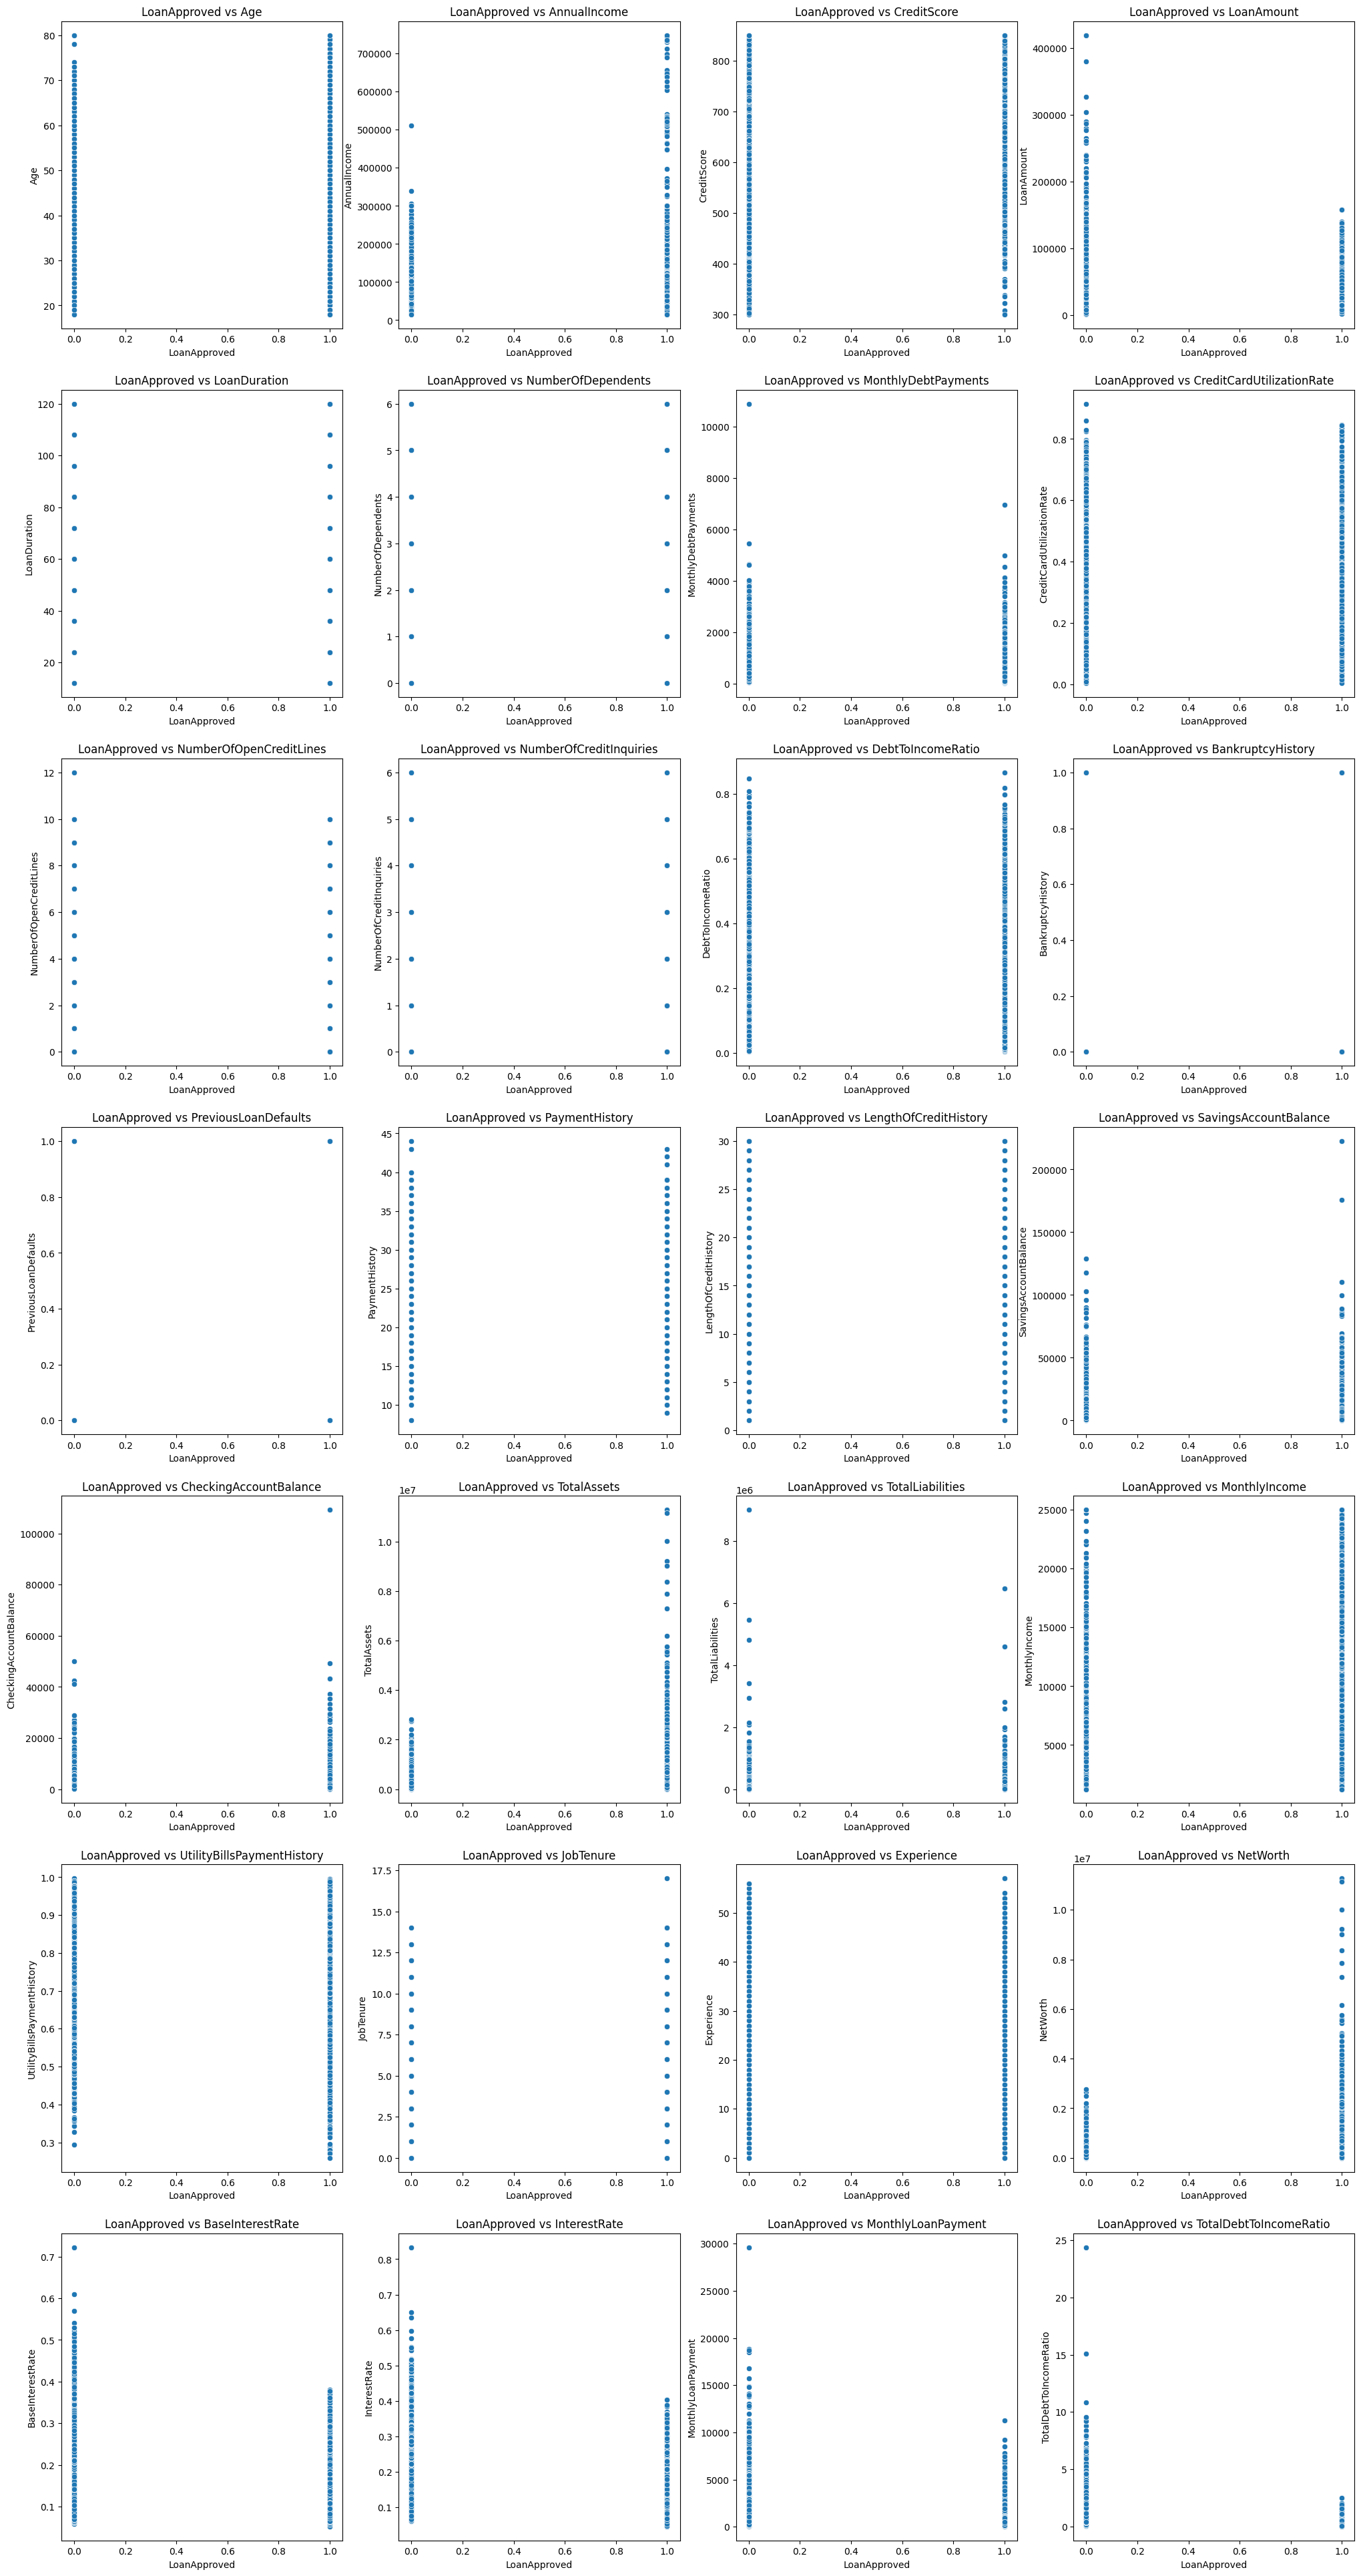

In [123]:
columns_with_number = data.select_dtypes(include=['number']).columns.to_list()
columns_with_number.remove('LoanApproved')
number_column_gr = 4
number_rows_gr = math.ceil(len(columns_with_number) / number_column_gr)
fig, axes = plt.subplots(number_rows_gr, number_column_gr, figsize=(25, 7 * number_rows_gr))
axes = axes.flatten()
for i, column in enumerate(columns_with_number):
    sns.scatterplot(data=data, x='LoanApproved', y=column, ax=axes[i])
    axes[i].set_title(f'LoanApproved vs {column}')

plt.show()
    

In [124]:
def encode(data):
    encode_data = data.copy()
    columns = encode_data.select_dtypes(include=['object', 'category']).columns.to_list()
    encode_data = pd.get_dummies(encode_data, columns=columns, prefix=columns)
    return encode_data

In [125]:
class CustomBaggingClassifier:
    def __init__(self, estimator, n_estimators=5, random_state=20):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.estimators = []
        self.random_state = random_state

    def fit(self, X, y):
        self.estimators = []
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            selection = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_selection = X[selection]
            y_selection = y[selection]
            estimator = clone(self.estimator)
            estimator.fit(X_selection, y_selection)
            self.estimators.append(estimator)
    
    def predict(self, X):
        predictions = []
        for i in self.estimators:
            predictions.append(i.predict(X))
        predictions = np.array(predictions)

        result = []
        for i in range(X.shape[0]):
            result.append(Counter(predictions[:, i]).most_common(1)[0][0])
        return np.array(result)
    
    def predict_proba(self, X):
        probas = []
        for estimator in self.estimators:
            probas.append(estimator.predict_proba(X))
        probas = np.array(probas)
        return np.mean(probas, axis=0)
        
        


In [126]:
data = data.dropna()
y = data['LoanApproved']
data = transorm(data)
if 'LoanApproved' in data.columns:
    data = data.drop(['LoanApproved'], axis=1)
data = encode(data)
scaler = StandardScaler()
numpy_data = scaler.fit_transform(data)

In [127]:
custom_bagging_classifier = CustomBaggingClassifier(DecisionTreeClassifier(), 10)
custom_bagging_classifier.fit(numpy_data, y.values)
y_pred = custom_bagging_classifier.predict(numpy_data)


print('Custom bagging')
print('accuracy_score', accuracy_score(y, y_pred))
print('precision_score', precision_score(y, y_pred))
print('recall_score', recall_score(y, y_pred))

bagging_classofier = BaggingClassifier(DecisionTreeClassifier(), 10)
bagging_classofier.fit(numpy_data, y.values)
y_pred = bagging_classofier.predict(numpy_data)

print('Sklearn')
print('accuracy_score', accuracy_score(y, y_pred))
print('precision_score', precision_score(y, y_pred))
print('recall_score', recall_score(y, y_pred))



Custom bagging
accuracy_score 0.9945924294011617
precision_score 0.9951095461658842
recall_score 0.9943315089913995


,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeClassifier()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",10
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


Sklearn
accuracy_score 0.9954936911676346
precision_score 0.9986234021632252
recall_score 0.9925723221266615


In [128]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (1 == y_pred))
    fp = np.sum((y_true == 0) & (1 == y_pred))

    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (1 == y_pred))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def fn(y_true, y_pred, n: int):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return (1 + n ** 2) * (pr * rec) / (n ** 2 * pr + rec)

def f1(y_true, y_pred):
    return fn(y_true, y_pred, 1)



def roc_auc(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    order = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true[order]
    
    tp = np.cumsum(y_true_sorted)
    fp = np.cumsum(1 - y_true_sorted) 
    
    eps = 1e-12
    tpr = tp / (tp[-1] + eps) 
    fpr = fp / (fp[-1] + eps) 
    return scipy.integrate.trapezoid(tpr, fpr)

In [129]:
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth = 5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.init = None
        self.max_depth = max_depth

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        self.init = np.log(np.mean(y) / (1 - np.mean(y)))
        
        prediction = np.full_like(y, self.init, dtype=float)
        
        for i in range(self.n_estimators):
            prob = self._sigmoid(prediction)
            
            gradient = y - prob

            estimator = DecisionTreeRegressor(max_depth=self.max_depth)
            estimator.fit(X, gradient)
            
            y_pred = estimator.predict(X)
            prediction += self.learning_rate * y_pred
            
            self.estimators.append(estimator)
        
        return self
    
    def predict_proba(self, X):
        prediction = np.full(X.shape[0], self.init, dtype=float)
        for estimator in self.estimators:
            prediction += self.learning_rate * estimator.predict(X)
        proba = self._sigmoid(prediction)
        return np.column_stack([1 - proba, proba])
    
    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba > 0.5).astype(int)

In [130]:

n_estimators = 10
learning_rate = 0.1
max_depth = 8

**Сравнение метрик и алгоритмов**

In [131]:
modelst = {"CustomGradientBoostingClassifier(моя реализация)": CustomGradientBoostingClassifier, 
            "GradientBoostingClassifier": GradientBoostingClassifier, 
            "xgboost.XGBClassifier": xgboost.XGBClassifier,
            "lightgbm.LGBMClassifier": lightgbm.LGBMClassifier, 
            "catboost.CatBoostClassifier": catboost.CatBoostClassifier}

for model_name, modelt in modelst.items():
    model = modelt(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    if lightgbm.LGBMClassifier == modelt:
        model = modelt(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, verbose=-1)
    elif modelt == modelt == catboost.CatBoostClassifier:
        model = modelt(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, verbose=False)

    model.fit(numpy_data, y.values)
    y_pred = model.predict(numpy_data)
    y_probs = model.predict_proba(numpy_data)[:, 1]
    print('==================================================================================')
    print(model_name)
    print(f'accuracy_score(sklearn, моя реализация):  {accuracy_score(y, y_pred)} {accuracy(y, y_pred)}')
    print(f'precision_score(sklearn, моя реализация): {precision_score(y, y_pred)} {precision(y, y_pred)}')
    print(f'recall_score(sklearn, моя реализация):  {recall_score(y, y_pred)} {recall(y, y_pred)}')
    print(f'roc_auc_score(sklearn, моя реализация): {roc_auc_score(y, y_probs)} {roc_auc(y, y_probs)}')
    print(f'f1_score(sklearn, моя реализация): {f1_score(y, y_pred)} {f1(y, y_pred)}')

CustomGradientBoostingClassifier(моя реализация)
accuracy_score(sklearn, моя реализация):  0.9605447626677348 0.9605447626677348
precision_score(sklearn, моя реализация): 0.9570267131242741 0.9570267131242741
recall_score(sklearn, моя реализация):  0.9663799843627834 0.9663799843627834
roc_auc_score(sklearn, моя реализация): 0.9927388287821113 0.9927047327464825
f1_score(sklearn, моя реализация): 0.9616806068858199 0.9616806068858199


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",10
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",8
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, `

GradientBoostingClassifier
accuracy_score(sklearn, моя реализация):  0.9742639695573804 0.9742639695573804
precision_score(sklearn, моя реализация): 0.97460441492479 0.97460441492479
recall_score(sklearn, моя реализация):  0.9751759186864738 0.9751759186864738
roc_auc_score(sklearn, моя реализация): 0.9968155025181697 0.996814358625273
f1_score(sklearn, моя реализация): 0.9748900830483634 0.9748900830483634


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

xgboost.XGBClassifier
accuracy_score(sklearn, моя реализация):  0.966553174444222 0.966553174444222
precision_score(sklearn, моя реализация): 0.9649941656942824 0.9649941656942824
recall_score(sklearn, моя реализация):  0.9698983580922595 0.9698983580922595
roc_auc_score(sklearn, моя реализация): 0.9938015454193714 0.9937686735498245
f1_score(sklearn, моя реализация): 0.9674400467927471 0.9674400467927471


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,8
,learning_rate,0.1
,n_estimators,10
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


lightgbm.LGBMClassifier
accuracy_score(sklearn, моя реализация):  0.938113358702183 0.938113358702183
precision_score(sklearn, моя реализация): 0.9380599922088041 0.9380599922088041
recall_score(sklearn, моя реализация):  0.9413604378420641 0.9413604378420641
roc_auc_score(sklearn, моя реализация): 0.9856095664766333 0.9856007966310945
f1_score(sklearn, моя реализация): 0.9397073170731707 0.9397073170731707


c:\projects\ML\lab2\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\projects\ML\lab2\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


catboost.CatBoostClassifier
accuracy_score(sklearn, моя реализация):  0.9259963949529341 0.9259963949529341
precision_score(sklearn, моя реализация): 0.9201382223075446 0.9201382223075446
recall_score(sklearn, моя реализация):  0.9368647380766224 0.9368647380766224
roc_auc_score(sklearn, моя реализация): 0.9822127865552046 0.9822127865552043
f1_score(sklearn, моя реализация): 0.9284261501210653 0.9284261501210654


**Optuna**

In [132]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 500, step=1)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 10)

    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    X_train, X_test, y_train, y_test = train_test_split(data.values, y.values)
    model.fit(X_train, y_train)

    y_probs = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_probs)


finder = optuna.create_study(
    direction='maximize',
    study_name='study',
    
)

finder.optimize(objective, n_jobs=10, n_trials=10)
print(finder.best_params)
n_estimators = finder.best_params['n_estimators']
learning_rate = finder.best_params['learning_rate']
max_depth = finder.best_params['max_depth']

[I 2025-12-14 19:00:49,817] A new study created in memory with name: study
[I 2025-12-14 19:00:50,670] Trial 0 finished with value: 0.9392516708244787 and parameters: {'n_estimators': 17, 'learning_rate': 0.0013467538167967784, 'max_depth': 2}. Best is trial 0 with value: 0.9392516708244787.
[I 2025-12-14 19:00:54,419] Trial 2 finished with value: 0.9530525936923562 and parameters: {'n_estimators': 145, 'learning_rate': 0.0028460188050959075, 'max_depth': 2}. Best is trial 2 with value: 0.9530525936923562.
[I 2025-12-14 19:00:56,822] Trial 9 finished with value: 0.9791573051791289 and parameters: {'n_estimators': 112, 'learning_rate': 0.021203201075645533, 'max_depth': 4}. Best is trial 9 with value: 0.9791573051791289.
[I 2025-12-14 19:01:00,107] Trial 4 finished with value: 0.9852135682423544 and parameters: {'n_estimators': 81, 'learning_rate': 0.142872581565817, 'max_depth': 8}. Best is trial 4 with value: 0.9852135682423544.
[I 2025-12-14 19:01:09,740] Trial 5 finished with value:

{'n_estimators': 81, 'learning_rate': 0.142872581565817, 'max_depth': 8}


In [133]:
test_data = pd.read_csv('test_c.csv')
test_data = test_data.drop([ 'ID'], axis=1)
test_data = transorm(test_data)
test_data = encode(test_data)
test_numpy_data = scaler.transform(test_data)

classifier = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
classifier.fit(numpy_data, y.values)
# test_res = classifier.predict_proba(test_numpy_data)[:, 1]
test_res = classifier.predict(test_numpy_data)

test_data = pd.DataFrame(test_res)
test_data.columns = ['LoanApproved']
test_data.to_csv('submission.csv', index_label='ID')

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.142872581565817
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",81
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",8
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N